In [172]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
#from scipy.special import binom
import pandas as pd
#import math
#import pickle
#import statsmodels.stats.power
import statsmodels.api as sm
#import statsmodels.stats.multitest as mt
#from sklearn import datasets
from sklearn.metrics import mean_squared_error

# Galton dataset

In [173]:
father_son = pd.read_csv('father_son.csv')
father_son.head()

,Unnamed: 0,fheight,sheight
0,1,65.04851,59.77827
1,2,63.25094,63.21404
2,3,64.95532,63.34242
3,4,65.75250,62.79238
4,5,61.13723,64.28113


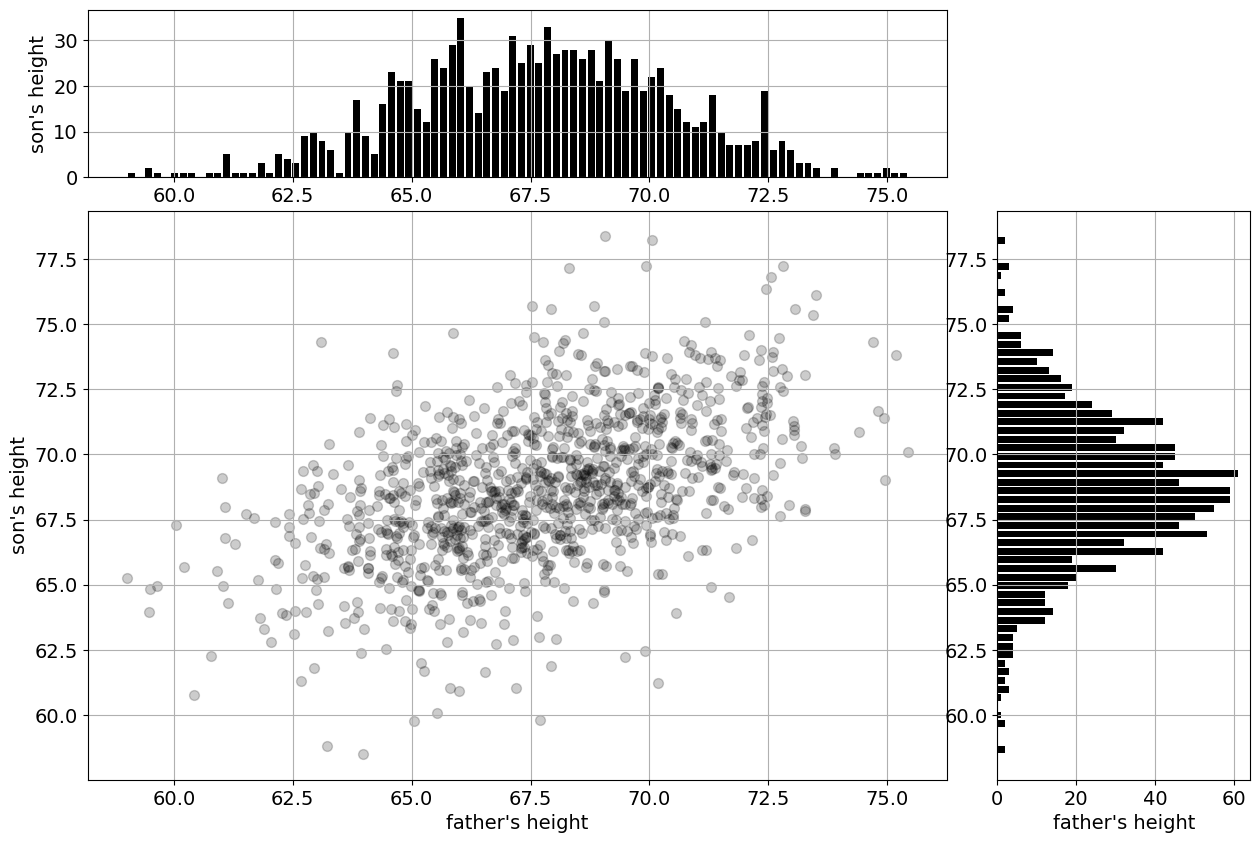

In [174]:
# see https://stackoverflow.com/questions/37008112/matplotlib-plotting-histogram-plot-just-above-scatter-plot

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

plt.rcParams.update({'font.size': 14})

fheight = father_son['fheight'].values
sheight = father_son['sheight'].values

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(4, 4)
ax_main = plt.subplot(gs[1:4, :3])
ax_fDist = plt.subplot(gs[0, :3],sharex=ax_main)
ax_sDist = plt.subplot(gs[1:4, 3],sharey=ax_main)

ax_main.scatter(fheight, sheight, c='k', alpha = .2, s=50)
ax_main.set(xlabel="father's height", ylabel="son's height")
ax_main.grid(True)

ax_fDist.hist(fheight, bins=90, align='mid', rwidth=0.8, color='k')
ax_fDist.set(ylabel="son's height")
ax_fDist.grid(True)

ax_sDist.hist(sheight, bins=60, orientation='horizontal', align='mid', rwidth=0.8, color='k')
ax_sDist.set(xlabel="father's height")
ax_sDist.grid(True)

plt.show()

In [175]:
x = np.random.randn(10) + 6
y = x/3 + np.random.randn(10)/1.5 - 2
x1 = np.array(range(11))

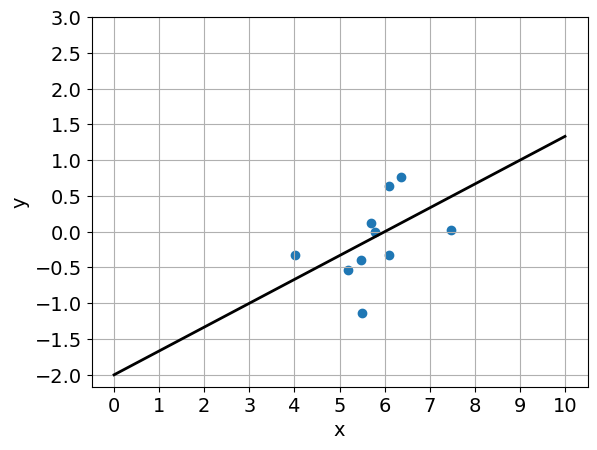

In [176]:
plt.scatter(x, y)
plt.plot(x1, x1/3 - 2, '-', c='k', lw=2)
plt.xticks(x1)
plt.yticks(np.linspace(-2, 3, 11))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

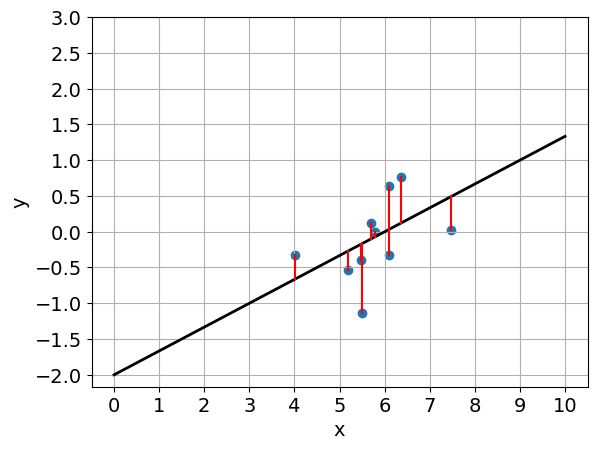

In [177]:
def f(x):
    return x/3 - 2

yf = f(x)
plt.scatter(x, y)
plt.plot(x1, f(x1), '-', c='k', lw=2)
[plt.plot([x[i], x[i]], [y[i], yf[i]], c='r') for i in range(len(x))]

plt.xticks(x1)
plt.yticks(np.linspace(-2, 3, 11))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

beta0: 33.88660435407791 beta1: 0.5140930386233077
intercept: 33.88660435407803 coefficient: 0.5140930386233065


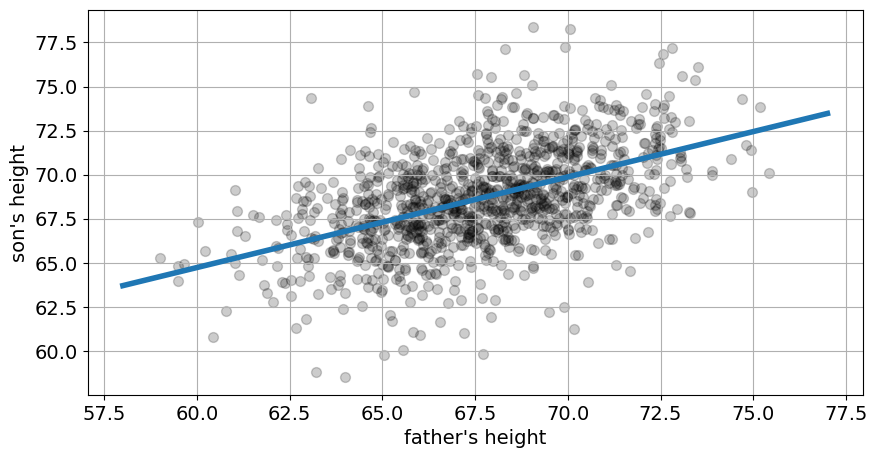

In [178]:
# see https://machinelearningmastery.com/introduction-to-expected-value-variance-and-covariance/

x, y = np.array(fheight), np.array(sheight)
beta1 = np.corrcoef(x, y)[0, 1] * np.std(y)/np.std(x)
beta0 = np.mean(y) - beta1 * np.mean(x)
print('beta0:', beta0, 'beta1:', beta1)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
print('intercept:', lm.params[0], 'coefficient:', lm.params[1])

x1 = np.linspace(58, 77, 100)
y1 = beta1 * x1 + beta0

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x1, y1, lw=4)
ax.set(xlabel="father's height", ylabel="son's height")
ax.grid(True)
plt.show()

# Regresia catre medie

In [179]:
x = np.random.randn(10)
ordered = np.argsort(x)[::-1]

y = np.random.randn(10)

# doar in 1 caz din 11 vom obtine un numar mai mic
print(x[ordered[0]], '>', y[ordered[0]])

0.4040508568145384 > 0.30154734233361247


In [180]:
# verificare
n = 10000000
x = np.random.randn(n, 10)
ordered = np.argsort(x, axis=1)
for i in range(x.shape[0]):
    x[i, :] = x[i, ordered[i][::-1]]

y = np.random.randn(n, 10)
print(np.sum(x[:, 0] < y[:, 0]) / n, 'vs. 1/11 =', 1/11)

0.090785 vs. 1/11 = 0.09090909090909091


rho: 0.501338311172343


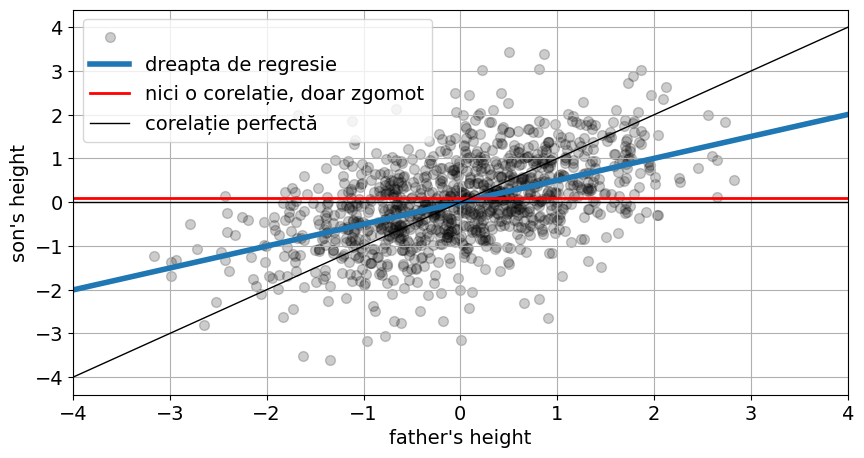

In [181]:
# originea este acum (Xbar, Ybar)
x, y = np.array(fheight), np.array(sheight)
x, y = (x - np.mean(x))/np.std(x), (y - np.mean(y))/np.std(y)
rho = np.corrcoef(x, y)[0, 1]
print('rho:', rho)

x1 = np.linspace(-4, 4, 100)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x1, rho * x1, lw=4)
ax.plot([4, -4], [0.1, 0.1], 'r', lw=2)
ax.plot(x1, x1, lw=1, c='k')
ax.plot(x1, [0] * len(x1), lw=1, c='k')
ax.legend(['', 'dreapta de regresie', 'nici o corelație, doar zgomot', 
           'corelație perfectă'])
ax.set(xlabel="father's height", ylabel="son's height", xlim=(-4, 4))
ax.grid(True)
plt.show()

# Laborator

__Q1__. Considerăm setul $X = \{0.725, 0.429, -0.372, 0.863\}$. Ce valoare a lui $\mu$ minimizează $\sum_i (X_i - \mu)^2$ ? Verificați cu câteva valori în jur.

In [182]:
#Curs 6, slide 6 + 7
X = [0.725, 0.429, -0.372, 0.863] #Mi-am scris elementele
mu = np.sum(X) / len(X) #le-am gasit media 
print ("Mu =",mu)
squares = sum([(x - mu) ** 2 for x in X]) #formula
print("Squered =", squares)

# Verificam cu cateva valori pentru mu
mu1 = 0.5
print ("Mu =",mu1)
squares = sum([(x - mu1) ** 2 for x in X]) #formula
print("Squered =", squares)

mu2 = 0.4
print ("Mu =",mu2)
squares = sum([(x - mu2) ** 2 for x in X]) #formula
print("Squered =", squares)


Mu = 0.41125
Squered = 0.9163127500000001
Mu = 0.5
Squered = 0.947819
Mu = 0.4
Squered = 0.916819


__Q2__. Pentru problema anterioară, considerăm că se dă un set de ponderi $w = \{2, 2, 1, 1\}$. Dorim să minimizăm suma $\sum_i w_i(x-\mu)^2$. Ce valoare pentru $\mu$ obținem?

In [183]:
X = [0.725, 0.429, -0.372, 0.863]
w = [2,2,1,1]
mu = np.average(X, weights=w) #calculăm media ponderată
# echivalent cu sum([w[i] * X[i]) pentru fiecare valoare din X / sum(w)
print("Mu = ", mu)

Mu =  0.46649999999999997


__Q3__. Pentru setul Galton (fathers.sons):
    
a) găsiți media, deviația standard și corelația dintre înălțimile părinților și cele ale fiilor.

b) centrați variabilele pentru fii și părinți și verificați că variabilele centrate au media 0.

c) realizați același lucru pentru deviația standard și verificați că ea devine 1.

d) realizați procedura completă de normalizare (centrare + scalare) și verificați $N(0, 1)$.

In [184]:
fheight = father_son['fheight'].values
sheight = father_son['sheight'].values

# a)
mean_father_height = np.mean(fheight)
mean_son_height = np.mean(sheight)
std_father_height = np.std(fheight)
std_son_height = np.std(sheight)
corr = np.corrcoef(fheight, sheight)[0, 1]

print("Media înălțimilor tatălui:", mean_father_height)
print("Media înălțimilor fiului:", mean_son_height)
print("Deviația standard a înălțimilor tatălui:", std_father_height)
print("Deviația standard a înălțimilor fiului:", std_son_height)
print("Corelația între înălțimile părinților și cele ale fiilor:", corr)

# b)
centered_father_heights = fheight - mean_father_height
centered_son_heights = sheight - mean_son_height
print("Media variabilelor centrate pentru înălțimile tatălui:", np.mean(centered_father_heights))
print("Media variabilelor centrate pentru înălțimile fiului:", np.mean(centered_son_heights))
# nu dau 0, not sure why tho

# c)
std_centered_father_heights = centered_father_heights / std_father_height
std_centered_son_heights = centered_son_heights / std_son_height
print("Deviația standard a variabilelor centrate pentru înălțimile tatălui:", np.std(std_centered_father_heights))
print("Deviația standard a variabilelor centrate pentru înălțimile fiului:", np.std(std_centered_son_heights))

# d)
normalized_father_heights = (fheight - mean_father_height) / std_father_height
normalized_son_heights = (sheight - mean_son_height) / std_son_height
print("Media variabilelor normalizate pentru înălțimile tatălui:", np.mean(normalized_father_heights))
print("Media variabilelor normalizate pentru înălțimile fiului:", np.mean(normalized_son_heights))
print("Deviația standard a variabilelor normalizate pentru înălțimile tatălui:", np.std(normalized_father_heights))
print("Deviația standard a variabilelor normalizate pentru înălțimile tatălui:", np.std(normalized_son_heights))


Media înălțimilor tatălui: 67.68709686456401
Media înălțimilor fiului: 68.68406965677178
Deviația standard a înălțimilor tatălui: 2.743594987591043
Deviația standard a înălțimilor fiului: 2.8133957698626495
Corelația între înălțimile părinților și cele ale fiilor: 0.5013383111723433
Media variabilelor centrate pentru înălțimile tatălui: -4.4557225359353225e-15
Media variabilelor centrate pentru înălțimile fiului: 1.6821011703708494e-14
Deviația standard a variabilelor centrate pentru înălțimile tatălui: 1.0
Deviația standard a variabilelor centrate pentru înălțimile fiului: 1.0
Media variabilelor normalizate pentru înălțimile tatălui: -1.6346437705798224e-15
Media variabilelor normalizate pentru înălțimile fiului: 5.98490541809064e-15
Deviația standard a variabilelor normalizate pentru înălțimile tatălui: 1.0
Deviația standard a variabilelor normalizate pentru înălțimile tatălui: 1.0


__Q4__. Considerăm un dataset pentru care deviația standard a variabilei prezise este dublu față de deviația standard a predictorului său. Variabilele au o corelație de 0.3. Dacă potrivim un model de regresie liniară, care va fi panta estimată?

In [185]:
std_y = 2 # Deviația standard a variabilei prezise
std_x = std_y / 2 # Deviația standard a predictorului
cor_xy = 0.3 # Coeficientul de corelație
beta_1 = cor_xy * (std_y / std_x) # Panta estimată
print("Panta estimata:", beta1) #Curs 6, slide 23

Panta estimata: 0.5140930386233077


Q5. Pentru problema anterioară, variabila prezisă are o medie 1 iar predictorul o medie de 0.5. Care este intercept-ul?

In [186]:
# Pentru intercept folosim formula de la beta0
mean_y = 1
mean_x = 0.5
beta0 = mean_y - beta1 * mean_x
print("Intercept-ul:", beta0)

Intercept-ul: 0.7429534806883462


Q6. Avem două cântare care au asociat zgomot, și mai mulți oameni pe care vrem să-i cântărim. Vom cântări fiecare persoană pe ambele cântare. Corelația este de 0.75. Fiecare set de măsurători este normalizat. Masa cuiva este la 2 deviații standard peste medie în primul grup de cântăriri. La câte deviații standard față de medie estimăm că este masa corespondentă în al doilea grup?

In [187]:
rho = 0.75
# ambele seturi de măsurători sunt normalizate, 
# putem considera că au media zero și deviația standard de unu

# persoană are masa la 2 deviații standard peste media primului set 
x = 2 # masa persoanei măsurată pe primul set
y=rho
# Cor(X, Y) = Cov(X, Y) / Sx*Sy
# cov(x, y) este covarianța dintre masele persoanelor măsurate pe cele două seturi
# iar std(x) și std(y) sunt deviațiile standard, adica ambele 1

# masa corespondenta in al doilea grup
y_dev = (y - np.mean(y)) / 1  

# numarul de deviatii standard de la media celui de-al doilea grup
y_deviation_from_mean = (x - y_dev) / 1  # reamintim std(x) = std(y) = 1

print("Masa corespondenta in al doilea grup este:", y)
print("Numarul de deviatii standard de la media celui de-al doilea grup este:", y_deviation_from_mean)


Masa corespondenta in al doilea grup este: 0.75
Numarul de deviatii standard de la media celui de-al doilea grup este: 2.0


Q7. Considerăm următorul dataset, în care încercăm să prezicem Y pe baza lui X:

In [188]:
x = np.array([8.63, 11.23, 9.73, 11.89, 10.25, 14.12, 11.24, 13.59, 13.86, 13.09, 12.05, 13.46, 13.45, 12.71, 15.08, 14.93,
     14.6, 15.73, 15.39, 16.37, 17.65, 15.44, 17.62, 17.44, 16.63, 17.23, 19.07, 19.19, 19.71, 18.39, 18.68, 19.09,
     19.71, 20.52, 19.49, 21.85, 20.3, 22.38, 20.81, 20.44, 21.09, 21.85, 22.09, 22.75, 23.8, 21.03, 25.08, 23.51,
     25.67, 25.01])
y = np.array([15.61, 16.89, 17.24, 15.41, 17.03, 16.56, 17.26, 17.84, 20.56, 21.95, 20.54, 18.66, 20.98, 22.22, 22.39, 
     21.91, 22.17, 23.83, 24.19, 24.7, 25.92, 25.78, 23.4, 26.36, 25.68, 26.02, 27.42, 26.92, 27.81, 30.12, 29.2,
     30.63, 28.79, 30.07, 30.94, 32.35, 31.85, 30.93, 32.34, 33.28, 33.02, 32.9, 34.53, 34.57, 34.66, 34.48, 36.12,
     35.53, 37.56, 36.58])


a) determinați media și deviația standard pentru fiecare set X și Y;

b) reprezentați printr-un scatterplot Y funcție de X, și pe laturi densitățile de probabilitate pentru X și Y (aveți exemplu mai sus, al treilea frame, sub "Galton dataset");

c) determinați coeficientul de corelație dintre cele două seturi;

d) 'fabricați' două seturi de date pentru care coeficientul de corelație să vă dea zero (sau cât mai apropiat de zero); reprezentați într-un scatter plot;

e) 'fabricați' două seturi de date pentru care coeficientul de corelație să vă dea 1, fără ca seturile să fie identice; reprezentați într-un scatter plot;

f) determinați corelația pentru problema inițială, precum și intercept-ul. Calculați dreapta de regresie prin cele două metode (manual și cu metoda statmodels.OLS), și reprezentați-o.

a) determinați media și deviația standard pentru fiecare set X și Y;


In [189]:
mean_x = np.mean(x)
mean_y = np.mean(y)
std_x = np.std(x)
std_y = np.std(y)

print("Media lui x:", mean_x)
print("Media lui y:", mean_y)
print("Deviația standard a lui x:", std_x)
print("Deviația standard a lui y:", std_y)


Media lui x: 17.4984
Media lui y: 26.473999999999997
Deviația standard a lui x: 4.321086141238103
Deviația standard a lui y: 6.381005249958662


b) reprezentați printr-un scatterplot Y funcție de X, și pe laturi densitățile de probabilitate pentru X și Y (aveți exemplu mai sus, al treilea frame, sub "Galton dataset");

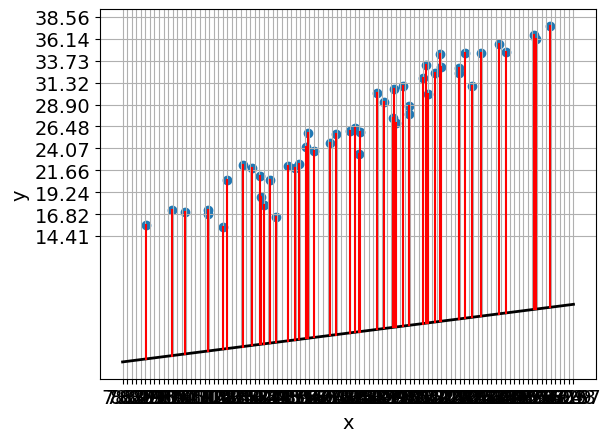

In [190]:

def f(x):
    return x/3 - 2

plt.scatter(x, y)
x1 = np.linspace(min(x)-1, max(x)+1, 100)
plt.plot(x1, f(x1), '-', c='k', lw=2)
# red lines
for i in range(len(x)):
    yf = f(x)
    plt.plot([x[i], x[i]], [y[i], yf[i]], c='r')

plt.xticks(x1)
plt.yticks(np.linspace(min(y)-1, max(y)+1, 11))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()
# ????

In [191]:
# c)
corr_xy = np.corrcoef(x, y)[0, 1]
print("Coeficient de corelatie: ", corr_xy)

Coeficient de corelatie:  0.9638387722596928


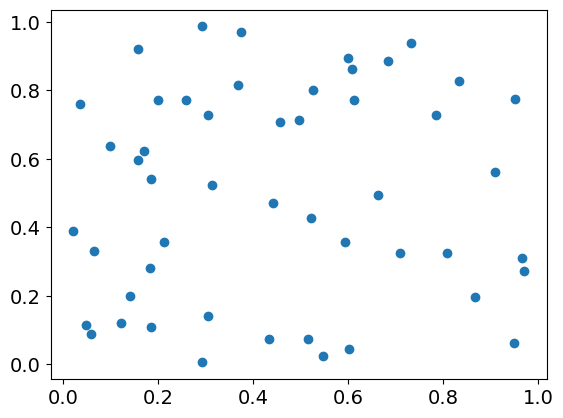

Coeficient de corelatie:  0.06220942514275163


In [192]:
# d) pentru asta putem sa luam valori random
np.random.seed(42)

# Generare seturi de date aleatoare
a = np.random.uniform(size=50)
b = np.random.uniform(size=50)

plt.scatter(a, b)
plt.show()

corr = np.corrcoef(a, b)[0, 1]
print("Coeficient de corelatie: ", corr)
# Vedem ca e 0.06, care e foarte aproape de 0


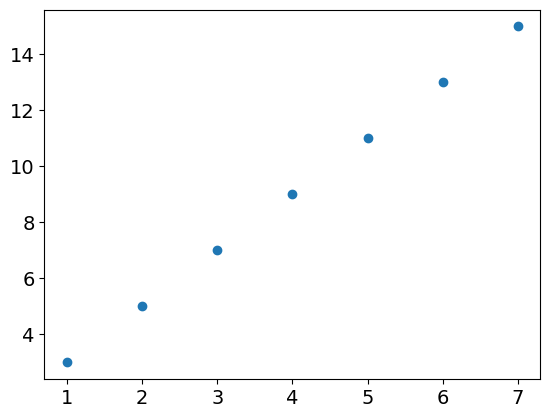

Coeficient de corelatie:  1.0


In [193]:
# e) folosim două seturi de date care sunt strâns legate printr-o relație liniară
# eventual folosim relatia y = 2x+1

c = np.array([1, 2, 3, 4, 5, 6, 7])
d = 2 * c + 1
plt.scatter(c, d)
plt.show()

corr = np.corrcoef(c, d)[0, 1]
print("Coeficient de corelatie: ", corr)

Intercept-ul:  1.5682909446285993
Coeficientul de regresie:  1.4233135061132103


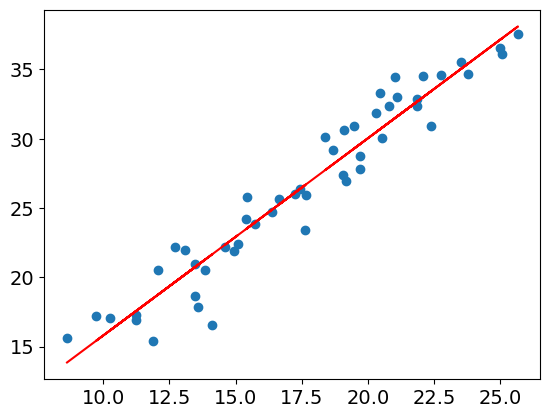

In [194]:
# f)
X = sm.add_constant(x) #adăugăm o coloană de 1 la x
model = sm.OLS(y, X).fit() #dreapta de regresie 
intercept = model.params[0]
print("Intercept-ul: ",intercept)
coef = model.params[1] # coeficientul de regresie
print("Coeficientul de regresie: ", coef)

plt.scatter(x, y)
plt.plot(x, coef * x + intercept, color='red')
plt.show()

Intercept-ul:  1.5682909446285827
Coeficientul de regresie:  1.4233135061132112


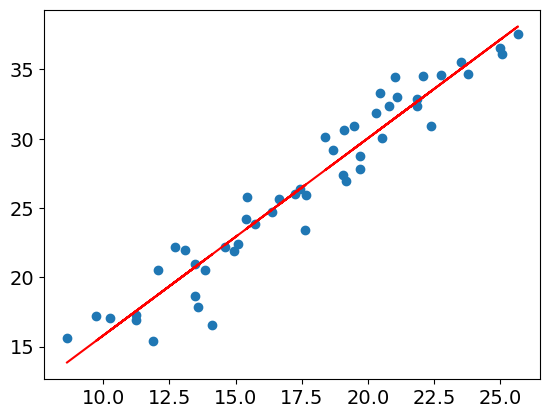

In [195]:
# O sa calculam manual acuma 
mean_x = np.mean(x)
mean_y = np.mean(y)

# c este coeficientul de regresie și i este intercept-ul
c = np.sum((x - mean_x) * (y - mean_y)) / np.sum((x - mean_x)**2) 
i = mean_y - c * mean_x

# Putem observa ca sunt la fel ca cele calculate mai sus 
print("Intercept-ul: ",i)
print("Coeficientul de regresie: ", c)

plt.scatter(x, y)
plt.plot(x, c * x + i, color='red')
plt.show()

Q8. Folosiți setul mtcars.csv. Realizați o regresie liniară cu consumul (miles per gallon) ca variabilă prezisă pe baza puterii motorului (horsepower). Realizați scatter plot-ul și trasați dreapta de regresie. Care este eroarea pătratică medie (RMS) dintre valorile de consum reale și valorile prezise?

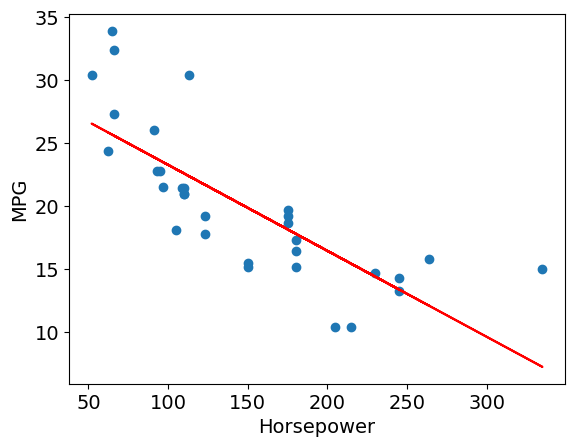

In [196]:
mtcars = pd.read_csv('mtcars.csv')

X = mtcars[['hp']]
y = mtcars['mpg']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit() # regresia liniară

plt.scatter(X['hp'], y)
plt.plot(X['hp'], model.predict(X), color='red')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

In [197]:
y_pred = model.predict(X) # valorile prezise
mse = mean_squared_error(y, y_pred) # eroarea patratica medie
rms = np.sqrt(mse)

print('RMS:', rms)

RMS: 3.74029708689949
